Data Source : https://www.kaggle.com/andrewlucci/huawei-social-network-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import networkx as nx

In [3]:
from networkx.algorithms import clique

In [4]:
data = pd.read_excel("Facebook_Data.xlsx")

In [5]:
data.head() 

,Unnamed: 0,Meredith Stransky,Brittney Mazzella,Yi Cook,Porter Devries,Suzanne Syverson,Ladawn Creason,Mikel Lamberson,Lakendra Lasiter,Kate Shiver,...,Tehmina,Happy Bacha,Younus,AVA,Alfred,Danish,Matloob,Sameed Shahzad,Frazer,Mubashir
0,Meredith Stransky,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Brittney Mazzella,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,Yi Cook,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
3,Porter Devries,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Suzanne Syverson,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [6]:
data.shape

(1000, 1001)

In [23]:
data_new = data.copy()
data_new = data_new[data_new ==1]
data_new

,Meredith Stransky,Brittney Mazzella,Yi Cook,Porter Devries,Suzanne Syverson,Ladawn Creason,Mikel Lamberson,Lakendra Lasiter,Kate Shiver,Sharika Aiken,...,Tehmina,Happy Bacha,Younus,AVA,Alfred,Danish,Matloob,Sameed Shahzad,Frazer,Mubashir
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Meredith Stransky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brittney Mazzella,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
Yi Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Porter Devries,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suzanne Syverson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Danish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Matloob,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sameed Shahzad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
cols = data.columns.tolist()  

In [17]:
data.set_index([cols[0]], inplace = True)

In [42]:
def get_edge(df):
    
    list_of_edges = []
    cols = df.columns.tolist()
    
    ## create member to member connections as list of tuples
    for j in range(len(cols[1:])):  
        row_col = df[cols[j]][j:]
        ##
        row_col = row_col[~row_col.isnull()]
        ##
        if len(row_col) > 0:
            index1 = row_col.index.tolist() ## connections names 
            ##
            name1 = cols[j]  ## person name 
            name1 = name1.replace("\xa0", "")
            ##
            edge_list1 = [(i.replace("\xa0", "") , name1) for i in index1]
            list_of_edges.append(edge_list1)
    
    
    return list_of_edges

In [43]:
%time edges = get_edge(data_new)
edges[0]

CPU times: user 1.33 s, sys: 18.5 ms, total: 1.34 s
Wall time: 1.46 s


[('Katina Gillespi ', 'Meredith Stransky '),
 ('Carmela Smyers ', 'Meredith Stransky '),
 ('Huong Polhemus ', 'Meredith Stransky '),
 ('Floyd Robinett ', 'Meredith Stransky '),
 ('Daphine Lynn ', 'Meredith Stransky '),
 ('Pearle Dimeo ', 'Meredith Stransky '),
 ('Lucie', 'Meredith Stransky '),
 ('Katherine', 'Meredith Stransky '),
 ('Aneeqa Tanveer', 'Meredith Stransky '),
 ('Meri Zindage Ho Tum', 'Meredith Stransky '),
 ('Arwen', 'Meredith Stransky '),
 ('Tommy', 'Meredith Stransky '),
 ('Malcum', 'Meredith Stransky '),
 ('Thaliya', 'Meredith Stransky '),
 ('Akram', 'Meredith Stransky '),
 ('Gabriel', 'Meredith Stransky '),
 ('Mehak', 'Meredith Stransky '),
 ('Ronnie', 'Meredith Stransky '),
 ('Dashing Hunk II', 'Meredith Stransky '),
 ('Kayla', 'Meredith Stransky '),
 ('Saptono', 'Meredith Stransky '),
 ('Usuf Khan', 'Meredith Stransky '),
 ('Faheem Akhtar', 'Meredith Stransky '),
 ('Jonathan', 'Meredith Stransky '),
 ('Ghulam Hyder Samejo', 'Meredith Stransky '),
 ('Khusheed', 'Mere

In [47]:
edges[1]

[('Sharika Aiken ', 'Brittney Mazzella '),
 ('Oren Mccaffrey ', 'Brittney Mazzella '),
 ('Trinh Gines ', 'Brittney Mazzella '),
 ('Xavier', 'Brittney Mazzella '),
 ('Kimberley', 'Brittney Mazzella '),
 ('Callum', 'Brittney Mazzella '),
 ('Donald', 'Brittney Mazzella '),
 ('Affaan', 'Brittney Mazzella '),
 ('Eloise', 'Brittney Mazzella '),
 ('Gomez', 'Brittney Mazzella '),
 ('Arwen', 'Brittney Mazzella '),
 ('Jakub', 'Brittney Mazzella '),
 ('Hari Kuncoro', 'Brittney Mazzella '),
 ('Marco', 'Brittney Mazzella '),
 ('Isabelle', 'Brittney Mazzella '),
 ('Qotadah', 'Brittney Mazzella '),
 ('Muhammad Shahzain', 'Brittney Mazzella '),
 ('Ronnie', 'Brittney Mazzella '),
 ('Jesse', 'Brittney Mazzella '),
 ('Mia', 'Brittney Mazzella '),
 ('Dashing Hunk II', 'Brittney Mazzella '),
 ('Kai', 'Brittney Mazzella '),
 ('Shafaq', 'Brittney Mazzella '),
 ('Luisa', 'Brittney Mazzella '),
 ('Oscar', 'Brittney Mazzella '),
 ('Zainab', 'Brittney Mazzella '),
 ('Abdul Malik', 'Brittney Mazzella '),
 ('Saure

In [48]:
edges[2]

[('Lakendra Lasiter ', 'Yi Cook '),
 ('Hobert Sagers ', 'Yi Cook '),
 ('Janita Thelen ', 'Yi Cook '),
 ('Beth Walraven ', 'Yi Cook '),
 ('Layton', 'Yi Cook '),
 ('Shahzaib Jutt', 'Yi Cook '),
 ('Aima', 'Yi Cook '),
 ('Marwan', 'Yi Cook '),
 ('Mhammad Nouman', 'Yi Cook '),
 ('Fredrick', 'Yi Cook '),
 ('Jason', 'Yi Cook '),
 ('Vidiya', 'Yi Cook '),
 ('Mirza Khan', 'Yi Cook '),
 ('Sardar Saad', 'Yi Cook '),
 ('Marco', 'Yi Cook '),
 ('Lilly', 'Yi Cook '),
 ('Taha Sheikh', 'Yi Cook '),
 ('Muhammad Shahzain', 'Yi Cook '),
 ('Homer', 'Yi Cook '),
 ('Hanna', 'Yi Cook '),
 ('Jamil', 'Yi Cook '),
 ('Umair Hassan', 'Yi Cook '),
 ('Evelina', 'Yi Cook '),
 ('Darca', 'Yi Cook '),
 ('Sarfaz', 'Yi Cook '),
 ('Mason', 'Yi Cook '),
 ('Frankie', 'Yi Cook '),
 ('Miya', 'Yi Cook '),
 ('Arshad Khan', 'Yi Cook '),
 ('Khusheed', 'Yi Cook '),
 ('Maud', 'Yi Cook '),
 ('Zoe', 'Yi Cook '),
 ('Rana Jhangir Khan', 'Yi Cook '),
 ('Hasnain Niazi', 'Yi Cook '),
 ('Daniella', 'Yi Cook '),
 ('Jacklyn', 'Yi Cook '),
 ('I

In [44]:
len(edges) ##  edge lists 

988

In [35]:
sum([len(e) for e in edges]) ## total number of edges 

50153

In [49]:
## create the graph 
G = nx.Graph()

In [50]:
cols = [i.replace("\xa0", "") for i in cols]
cols

['Unnamed: 0',
 'Meredith Stransky ',
 'Brittney Mazzella ',
 'Yi Cook ',
 'Porter Devries ',
 'Suzanne Syverson ',
 'Ladawn Creason ',
 'Mikel Lamberson ',
 'Lakendra Lasiter ',
 'Kate Shiver ',
 'Sharika Aiken ',
 'Katina Gillespi ',
 'Carmela Smyers ',
 'Caron Delapena ',
 'Missy Harlin ',
 'Danuta Caylor ',
 'Tu Viloria ',
 'Season Follmer ',
 'Dusty Passarelli ',
 'Hobert Sagers ',
 'Huong Polhemus ',
 'Terrance Langone ',
 'Floyd Robinett ',
 'Oren Mccaffrey ',
 'Wilhelmina Monsour ',
 'Issac Montas ',
 'Celeste Hollenbach ',
 'Mee Galli ',
 'Daphine Lynn ',
 'Bobbie Straka ',
 'Pearle Dimeo ',
 'Trisha Allis ',
 'Alton Towell ',
 'Del Garlington ',
 'Adela Babst ',
 'Reginia Rockwell ',
 'Venice Liller ',
 'Elsie Mealing ',
 'Alisia Allison ',
 'Charity Schrecengost ',
 'Minh Adelson ',
 'Crystal Batson ',
 'Trinh Gines ',
 'Janita Thelen ',
 'Tasia Jeter ',
 'Beth Walraven ',
 'Fe Raymond ',
 'Alesia Fain ',
 'Shavonne Bunch ',
 'Bruce Wix ',
 'Saif Ali',
 'Ghulam Rasool',
 'Am

In [51]:
nodes = cols[1:]
G.add_nodes_from(nodes)

In [52]:
G.add_edges_from(edges[0])

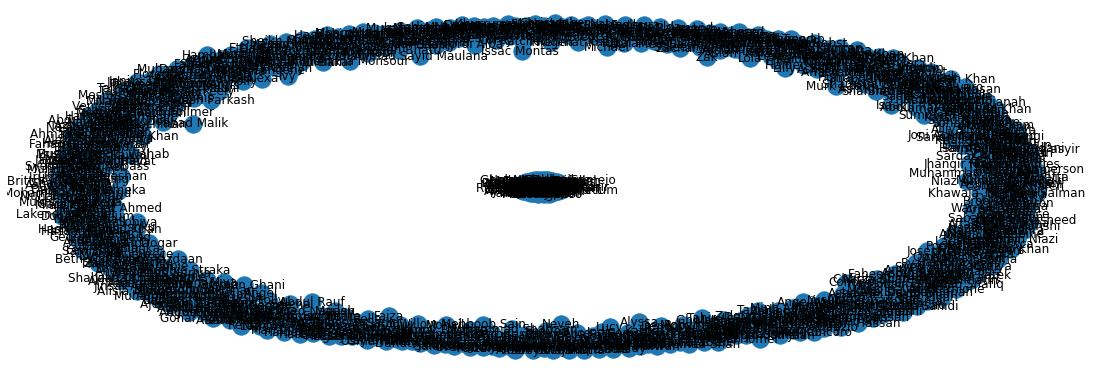

In [53]:
plt.figure(figsize = (15,5))
nx.draw(G, with_labels = True )

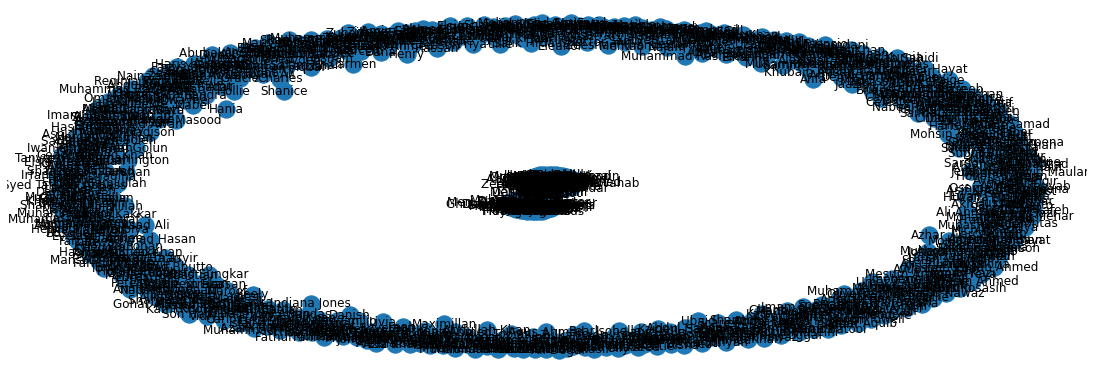

In [54]:
## Add second member's connections and display graph
G.add_edges_from(edges[1])
plt.figure(figsize = (15,5))
nx.draw(G, with_labels = True )

In [55]:
## Check the degree 
G.degree()

DegreeView({'Meredith Stransky ': 89, 'Brittney Mazzella ': 116, 'Yi Cook ': 0, 'Porter Devries ': 0, 'Suzanne Syverson ': 0, 'Ladawn Creason ': 0, 'Mikel Lamberson ': 0, 'Lakendra Lasiter ': 0, 'Kate Shiver ': 0, 'Sharika Aiken ': 1, 'Katina Gillespi ': 1, 'Carmela Smyers ': 1, 'Caron Delapena ': 0, 'Missy Harlin ': 0, 'Danuta Caylor ': 0, 'Tu Viloria ': 0, 'Season Follmer ': 0, 'Dusty Passarelli ': 0, 'Hobert Sagers ': 0, 'Huong Polhemus ': 1, 'Terrance Langone ': 0, 'Floyd Robinett ': 1, 'Oren Mccaffrey ': 1, 'Wilhelmina Monsour ': 0, 'Issac Montas ': 0, 'Celeste Hollenbach ': 0, 'Mee Galli ': 0, 'Daphine Lynn ': 1, 'Bobbie Straka ': 0, 'Pearle Dimeo ': 1, 'Trisha Allis ': 0, 'Alton Towell ': 0, 'Del Garlington ': 0, 'Adela Babst ': 0, 'Reginia Rockwell ': 0, 'Venice Liller ': 0, 'Elsie Mealing ': 0, 'Alisia Allison ': 0, 'Charity Schrecengost ': 0, 'Minh Adelson ': 0, 'Crystal Batson ': 0, 'Trinh Gines ': 1, 'Janita Thelen ': 0, 'Tasia Jeter ': 0, 'Beth Walraven ': 0, 'Fe Raymond '

In [56]:
## Add the remaining member connections to the graph
for e in edges[2:]:
    G.add_edges_from(e)

In [57]:
degree_list = list(G.degree())
degree_list

[('Meredith Stransky ', 89),
 ('Brittney Mazzella ', 116),
 ('Yi Cook ', 90),
 ('Porter Devries ', 106),
 ('Suzanne Syverson ', 102),
 ('Ladawn Creason ', 100),
 ('Mikel Lamberson ', 89),
 ('Lakendra Lasiter ', 107),
 ('Kate Shiver ', 83),
 ('Sharika Aiken ', 104),
 ('Katina Gillespi ', 113),
 ('Carmela Smyers ', 86),
 ('Caron Delapena ', 109),
 ('Missy Harlin ', 104),
 ('Danuta Caylor ', 102),
 ('Tu Viloria ', 87),
 ('Season Follmer ', 101),
 ('Dusty Passarelli ', 103),
 ('Hobert Sagers ', 80),
 ('Huong Polhemus ', 107),
 ('Terrance Langone ', 102),
 ('Floyd Robinett ', 85),
 ('Oren Mccaffrey ', 99),
 ('Wilhelmina Monsour ', 100),
 ('Issac Montas ', 101),
 ('Celeste Hollenbach ', 102),
 ('Mee Galli ', 109),
 ('Daphine Lynn ', 107),
 ('Bobbie Straka ', 101),
 ('Pearle Dimeo ', 87),
 ('Trisha Allis ', 97),
 ('Alton Towell ', 105),
 ('Del Garlington ', 90),
 ('Adela Babst ', 79),
 ('Reginia Rockwell ', 96),
 ('Venice Liller ', 119),
 ('Elsie Mealing ', 106),
 ('Alisia Allison ', 111),
 (

In [58]:
## Person having the most connections 
sorted(degree_list , key = lambda x : x[1] , reverse = True)[0:5]

[('Engkos Kosasih', 127),
 ('Ernie', 127),
 ('Zack', 126),
 ('Fahad Rehman', 126),
 ('Sylvia', 125)]

In [59]:
## Person with least connections 
sorted(degree_list , key = lambda x : x[1] )[0:5]

[('Aleisha', 64),
 ('Tanveer', 71),
 ('Lydia', 76),
 ('Ayyan', 76),
 ('Ariella', 77)]

In [60]:
N, K = G.order(), G.size()
avg_deg = float(K)/N
print("No of nodes :{0} and no of edges : {1}".format(N , K))
print("Average Degree {}".format(avg_deg))

No of nodes :1000 and no of edges : 50153
Average Degree 50.153


In [61]:
## Clustering values 
## for node 0

print("Clustering for 1st member {}".format(nx.clustering(G, nodes[0])))


print("Avg clustering : {}".format(nx.average_clustering(G) )) 

Clustering for 1st member 0.09933605720122574
Avg clustering : 0.100329588445239


In [62]:
largest_cc = max(nx.connected_components(G), key=len) ## nodes of the largest connected components 
G_mc = G.subgraph(largest_cc).copy() ## create a subgraph 

%time bet_cen = nx.betweenness_centrality(G_mc)
##
%time clo_cen = nx.closeness_centrality(G_mc)
##
##
%time eig_cen = nx.eigenvector_centrality(G_mc)

CPU times: user 17.8 s, sys: 112 ms, total: 17.9 s
Wall time: 18.7 s
CPU times: user 30.1 s, sys: 149 ms, total: 30.2 s
Wall time: 30.6 s
CPU times: user 86.5 ms, sys: 855 µs, total: 87.4 ms
Wall time: 88.4 ms


In [63]:
G_mc.order()

1000

In [64]:
len(list(G_mc.edges()))

50153

In [65]:
def get_top_keys(dictionary , top):
    #items = dictionary.items()
    items = sorted(dictionary.items() , reverse = True , key = lambda item: item[1])
    val = map(lambda x: x[0], items[:top])
    return items[:11]

In [66]:
get_top_keys(bet_cen , 10)

[('Ernie', 0.0014707100121539671),
 ('Engkos Kosasih', 0.001468302758588729),
 ('Sylvia', 0.0014362752642014785),
 ('Zack', 0.001424673955649196),
 ('Fahad Rehman', 0.0014158890999055739),
 ('Umtiti', 0.0014049614919470785),
 ('Noor', 0.0013690865209203418),
 ('Ahmed', 0.0013598774834562945),
 ('Asghar', 0.0013592802253661346),
 ('Abdullah Khan', 0.001357846062184436),
 ('Jasmin', 0.0013505967027474509)]

In [67]:
top_bet_cen = get_top_keys(bet_cen , 10)
top_clo_cen = get_top_keys(clo_cen , 10)
top_eig_cen = get_top_keys(eig_cen , 10)

In [68]:
print("Top 10 Betweenness Centrality :")
for n in top_bet_cen:
    print(n[0])
    

Top 10 Betweenness Centrality :
Ernie
Engkos Kosasih
Sylvia
Zack
Fahad Rehman
Umtiti
Noor
Ahmed
Asghar
Abdullah Khan
Jasmin


In [69]:
print("Top 10 Closeness Centrality :")
for n in top_clo_cen:
    print(n[0])

Top 10 Closeness Centrality :
Engkos Kosasih
Ernie
Zack
Fahad Rehman
Sylvia
Umtiti
Asghar
Abdullah Khan
Ahmed
Noor
Carlo


In [70]:
print("Top 10 Eigenvector Centrality :")
for n in top_eig_cen:
    print(n[0])

Top 10 Eigenvector Centrality :
Zack
Engkos Kosasih
Fahad Rehman
Ernie
Abdullah Khan
Umtiti
Asghar
Subhaan
Sylvia
Carlo
Rawail


In [71]:
from networkx.algorithms.distance_measures import center

In [72]:
len(nx.center(G_mc)) ## number of members who are least distant apart from the rest of the members 

963

In [76]:
nx.center(G_mc)[:10] ## 10 members in the center

['Meredith Stransky ',
 'Brittney Mazzella ',
 'Yi Cook ',
 'Porter Devries ',
 'Suzanne Syverson ',
 'Ladawn Creason ',
 'Mikel Lamberson ',
 'Lakendra Lasiter ',
 'Kate Shiver ',
 'Sharika Aiken ']

In [73]:
nx.radius(G_mc) ## shortest connection distance between two people 

2

In [74]:
nx.diameter(G_mc) ## largest connection distance between two people 

3

In [75]:
len(nx.periphery(G_mc)) ## number of people that are further away in connections from the rest of the members .

37

In [77]:
nx.periphery(G_mc)[:10] ## 10 members who are at periphery

['Season Follmer ',
 'Ubeid',
 'Shoaib',
 'Shahzaib Jutt',
 'Evie',
 'Shayan',
 'Zeeshan Khan',
 'Naja',
 'Jordi Alba',
 'Muhammad Khalil']